### Uprate power plant data descriptives and discussion

Below is a mix of code, output, and comments in "notebook" form. The code is in ipython, though that is not particularily important at the moment. 

I start by loading in some packages I might need, and loading in some data - you can ignore this

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpt
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
import ggplot
import scipy

%matplotlib inline


In [2]:
pd.options.display.max_rows = 2000
pd.options.display.max_columns = 100

uprate_data=pd.read_csv("/Users/johannesmauritzen/research/power_plants_data/uprate_data.csv")



Below I group the data by planned uprate year and see how much in mw uprates were planned in that year. Chart is below

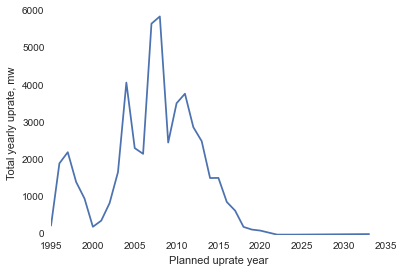

In [15]:
uprate_by_year = uprate_data.groupby(["puyr"], sort=True)["puscap"].sum()
uprate_by_year = uprate_by_year[1:]
uprate_by_year.columns = "yearly_uprate"

fig, ax = plt.subplots()
ax.plot(uprate_by_year.index, uprate_by_year)
ax.set_xlabel("Planned uprate year")
ax.set_ylabel("Total yearly uprate, mw")
plt.show()

In the datasets there are variables for summer up-rate and winter up-rate ("puscap" and "puwcap") respectively. For most cases they are the same, like you can see in the histograms below. You can also see that most of the rate ups are small - also as a percentage of original capacity.

In [16]:
summer_up = uprate_data["puscap"][(uprate_data["puscap"]!=0) & (uprate_data["puscap"].notnull())].copy()
summer_up = np.array(summer_up)

winter_up = uprate_data["puwcap"][(uprate_data["puwcap"]!=0) & (uprate_data["puwcap"].notnull())].copy()
winter_up = np.array(winter_up)


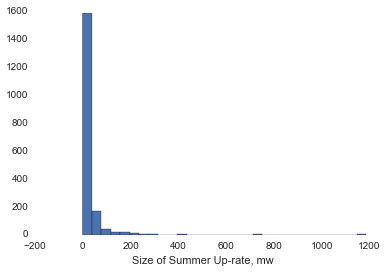

In [17]:
fig, ax = plt.subplots()
ax.hist(summer_up, bins=30)
ax.set_xlabel("Size of Summer Up-rate, mw")
ax.set_label("frequency")
plt.show()

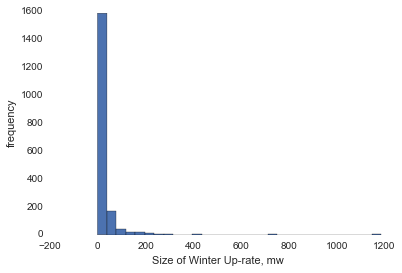

In [18]:
fig, ax = plt.subplots()
ax.hist(summer_up, bins=30)
ax.set_xlabel("Size of Winter Up-rate, mw")
ax.set_ylabel("frequency")
plt.show()

In [19]:
summer_perc_uprate = uprate_data["puscap"][uprate_data["scap"]!=0]/uprate_data["scap"][uprate_data["scap"]!=0]*100
summer_perc_uprate = summer_perc_uprate[summer_perc_uprate!=0]
summer_perc_uprate = summer_perc_uprate[summer_perc_uprate>0]
summer_perc_uprate = np.array(summer_perc_uprate)


#### Here is the distribution of original capacities of the plants


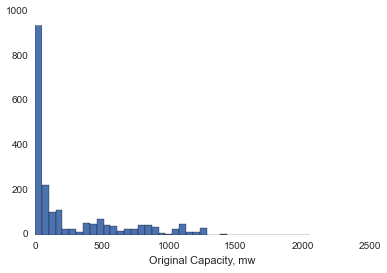

In [25]:
orig_capacity = uprate_data["scap"][uprate_data["scap"].notnull()]
orig_capacity = np.array(orig_capacity)

fig, ax = plt.subplots()
ax.hist(orig_capacity, bins=40)
ax.set_xlabel("Original Capacity, mw")
plt.show()

#### Now as a percentage of original (summer) capacity

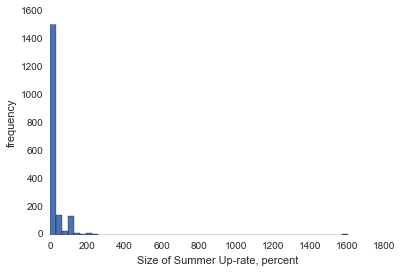

In [20]:
fig, ax = plt.subplots()
ax.hist(summer_perc_uprate, bins=50)
ax.set_xlabel("Size of Summer Up-rate, percent")
ax.set_ylabel("frequency")
plt.show()

#### Original (summer) capacity

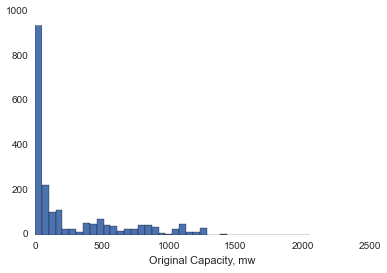

In [26]:
orig_capacity = uprate_data["scap"][uprate_data["scap"].notnull()]
orig_capacity = np.array(orig_capacity)

fig, ax = plt.subplots()
ax.hist(orig_capacity, bins=40)
ax.set_xlabel("Original Capacity, mw")
plt.show()

#### Initial year of operation of plants

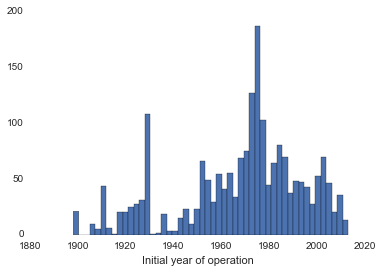

In [27]:
initial_year = [uprate_data["inyr"][uprate_data["inyr"].notnull()]]

fig, ax = plt.subplots()
ax.hist(initial_year, bins=50)
ax.set_xlabel("Initial year of operation")
plt.show()

####Years from initial year of operation to planned uprate

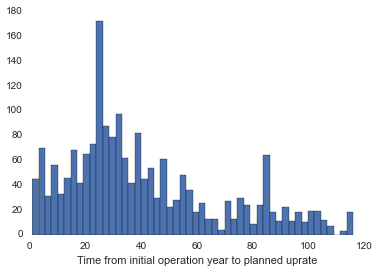

In [30]:
uprate_data["time_to_uprate"] = uprate_data["puyr"] - uprate_data["inyr"]

time_to_uprate = uprate_data["time_to_uprate"]
time_to_uprate = np.array(time_to_uprate[time_to_uprate>0])

fig, ax = plt.subplots()
ax.hist(time_to_uprate, bins=50)
ax.set_xlabel("Time from initial operation year to planned uprate")
plt.show()

#### Questions for Carl: 


A few things I was wondering as I was working through the data:
* Its a cool dataset, and I can see it must have taken a lot of work to put it together. I took a look at the source data on the EIA website - am I correct in thinking that you have merged together all the year-files of data so that this is a panel data set for each plant for each reporting year? 
* What variable would I look at to figure out if/when an uprate actually happened?
* An uprate happens at the generator level, correct? Or is an uprate at the plant level? Is adding a generator to a plant a form of uprate?
* I havent gone through the downrate data yet, but what are the reasons for choosing to downrate as opposed to simply decommissioning?
* This is also a variable for nameplate capacity - "nplate" - which tends to be a bit higher than summer and winter capacity. Do you know why this is generally the case? That is - why is nameplate capacity higher than both summer and winter capacity? Are generators running at less than their potential?


### Brainstorming

#### Real options model of uprating (downrating)


If I understand correctly(?) the suggested idea here is to look at the decision - and timing of decision - to uprate a power generator - and see to what extent this can be modeled as a real option. I am fairly new to real options, so it might be good for me to get a short explanation of "what is new/interesting/important" here. In other words, if we look ahead, how do we motivate that this paper is important?

Related - why is uprating important to look at compared to new investments? Would you expect significant differences in how a company will act? Is this one of the potentially interesting questions: Do companies act differently between new investments and uprates?

Is it interesting to look at differences between the different types of owners - IOU vs. public utilities (Im thinking like TVA, but I could be getting my terminology wrong). This might be going in the direction of the stuff SE has done with Kristin Linnerud?

#### Survival model of uprating (or other events)

One methodological idea is that since we are trying to model an event - an uprate - it might be natural to use survival models. Here the idea is to try to model the hazard of an event given several risk factors (as the name suggests - these methods come from medical research). These can be extended from single events to multiple events: planning an uprate, uprating. Multiple outcomes are also possible to model - for example, what is the hazard of an uprate vs. decommisioning as a functioning of how old the plant is and other factors. 

#### Bayesian Hierarchical model

I mentioned in our first meeting the idea of using bayesian methods to do an analysis. After seeing the data, I think that is still a good idea. The data has a very natural and somewhat complex hierarchical form: Several years of data for a generator, a generator is part of a plant, and a plant is part of a utility. The basic advantage of using bayesian (simualation) methods is that you can explicitly model a range of probability distribution for each level of the hierarchy, rather than cruder fixed-effects and/or random effects type normal approximations.  

#### Environmental/political uncertainty

From what I understand from reading the papers, one of the big uncertainties that utilities with coal generators face are potential changes in regulation due to concern about pollution and climate change. It would seem natural to try to proxy this and try to estimate the effect this has on uprates, as well as perhaps new investments.  

One idea for proxying concern for the environment is to use data on google searches (freely available from google) on for example "pollution" or "climate change". You can get a state-by-state breakdown of this - even county-by-county if I remember right.

Twitter also grants access to some data through its API - so how certain topics "trend" could also be used as a proxy. 

#### Political Economy of coal plants

From what I remember from reading about the California energy crisis, energy regulation in the US is a bit of a mess with a lot of different intersecting regulations at the local/regional, state and federal level. Perhaps it might be possible to look at how different regulations, politics, elections affect investment / shut-down / uprating of plants.